# 第I部
# 第3章 2つの変数の記述統計

## 3.2 散布図

In [1]:
options(repr.plot.width = 4, repr.plot.height = 4)

In [2]:
stattest1 <- c(6,10,6,10,5,3,5,9,3,3,11,6,11,9,7,5,8,7,7,9)
stattest2 <- c(10,13,8,15,8,6,9,10,7,3,18,14,18,11,12,5,7,12,7,7)

In [3]:
library(ggplot2)

Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

In [4]:
library(pipeR)

Warning message:
: package ‘pipeR’ was built under R version 3.2.4

In [5]:
d <- data.frame(stattest1, stattest2)

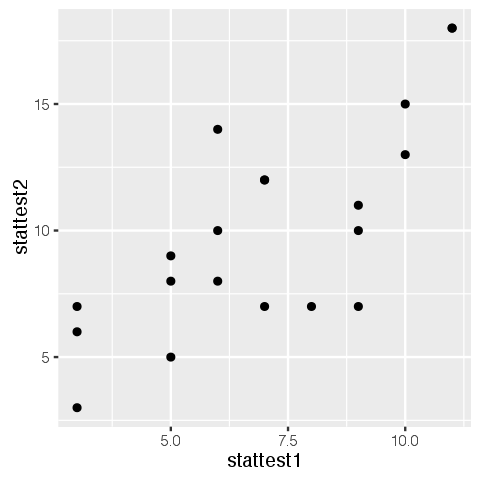

In [6]:
d %>>% 
    ggplot(aes(x = stattest1, y = stattest2)) + 
    geom_point()

In [7]:
psychology <- c(13,14,7,12,10,6,8,15,4,14,9,6,10,12,5,12,8,8,12,15)
d$psychology <- psychology

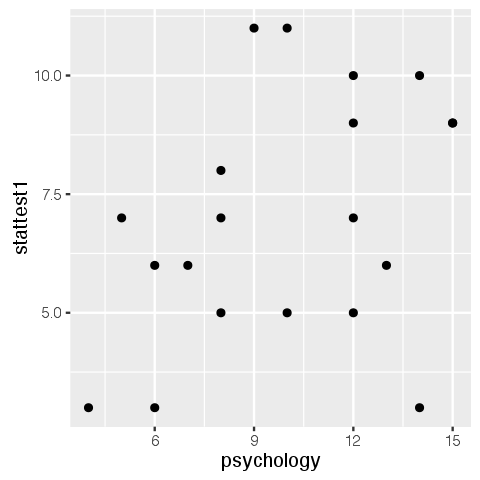

In [8]:
d %>>% 
    ggplot(aes(x = psychology, y = stattest1)) + 
    geom_point()

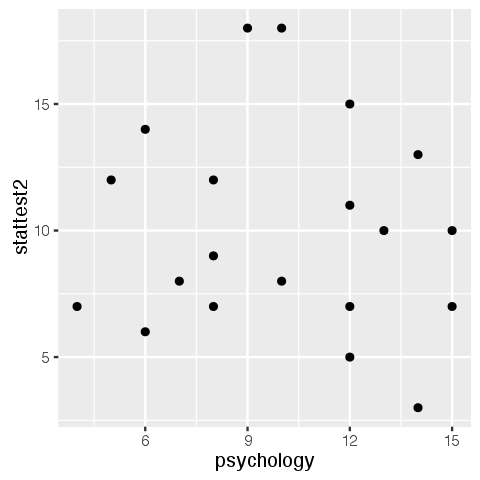

In [9]:
d %>>% 
    ggplot(aes(x = psychology, y = stattest2)) + 
    geom_point()

## 3.3 共分散

In [10]:
covar <- ((stattest1 - mean(stattest1)) * (stattest2 - mean(stattest2))) %>>% mean
covar

[1] 7.55

* `cov` は不偏共分散（n-1 で割る）

In [11]:
cov(stattest1, stattest2)

[1] 7.947368

In [12]:
cov(stattest1, stattest2) * (length(stattest1) - 1) / length(stattest1)

[1] 7.55

* 共分散は測定単位の影響を受ける

In [13]:
height.m <- c(1.5,1.6,1.7,1.8,1.9)
height.cm <- height.m * 100
weight <- c(50,70,60,80,90)

In [14]:
cov(height.m, weight)

[1] 2.25

In [15]:
cov(height.cm, weight)

[1] 225

## 3.4 相関係数

$r_{xy} = \frac{s_{xy}}{s_x s_y}$

* 統計学テスト1と統計学テスト2

In [16]:
cov(stattest1, stattest2) / (sd(stattest1) * sd(stattest2))

[1] 0.749659

In [17]:
cor(stattest1, stattest2)

[1] 0.749659

* 心理学テストと統計学テスト

In [18]:
cor(psychology, stattest1)

[1] 0.3826645

In [19]:
cor(psychology, stattest2)

[1] -0.09350516

## 3.5 クロス集計表

In [20]:
math <- c("嫌い","嫌い","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い", "好き","好き","嫌い","好き","嫌い","嫌い","好き","嫌い","嫌い","嫌い","嫌い")

In [21]:
table(math)

math
嫌い 好き 
  14    6 

In [22]:
stat <- c("好き","好き","好き","好き","嫌い","嫌い","嫌い","嫌い","嫌い", "嫌い","好き","好き","好き","嫌い","好き","嫌い","嫌い","嫌い","嫌い","嫌い")

In [23]:
table(stat)

stat
嫌い 好き 
  12    8 

In [24]:
table(math, stat)

      stat
math   嫌い 好き
  嫌い   10    4
  好き    2    4

## 3.6 ファイ係数

In [25]:
math.bin <- ifelse(math=="好き",1,0)
math.bin

[1] 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0

In [26]:
stat.bin <- ifelse(stat=="好き",1,0)
stat.bin

[1] 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0

In [27]:
cor(math.bin, stat.bin)

[1] 0.3563483

## 練習問題

### （1）

In [28]:
d.study <- data.frame(time = c(1, 3, 10, 12, 6, 3, 8, 4, 1, 5), score = c(20, 40, 100, 80, 50, 50, 70, 50, 10, 60))
d.study

,time,score
1,1,20
2,3,40
3,10,100
4,12,80
5,6,50
6,3,50
7,8,70
8,4,50
9,1,10
10,5,60


In [29]:
library(Cairo)

* 日本語を描画する設定．Macのみ．
    * Mac で Cairo を使うと，フォントの指定が反映されずに日本語は豆腐になる．RStudioからでもなる．
    * `CairoFonts()` で設定するとすべてのFontが置き換わってしまうので，プレビュー用．
    * Macの人が実際に使う図を保存する場合は，Cairo以外の方法で．
* Windows は ggplot の theme で日本語フォントを設定するだけで良い．

In [30]:
CairoFonts(regular = "IPAexGothic")

pdf 
  2

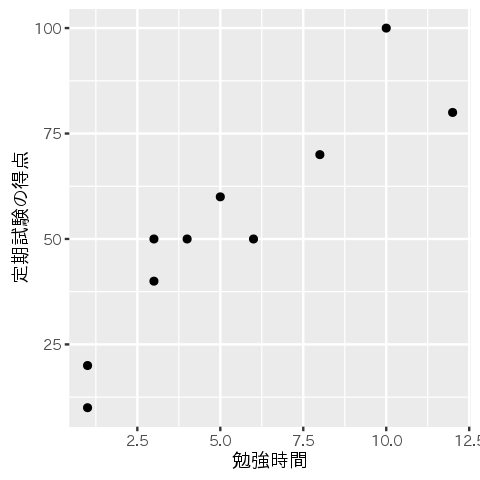

In [31]:
Cairo(type = "raster")
d.study %>>% 
    ggplot(aes(x = time, y = score)) + 
        geom_point() + 
        theme(axis.title = element_text(family="IPAexGothic")) + 
        xlab("勉強時間") + 
        ylab("定期試験の得点")
dev.off()

### （2）

In [32]:
cor(d.study$time, d.study$score)

[1] 0.9092974

### （3）

In [33]:
library(readxl)

Warning message:
: package ‘readxl’ was built under R version 3.2.4

In [34]:
d.food <- read_excel("Chap03_food.xlsx", sheet = 1)

In [35]:
str(d.food)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	20 obs. of  2 variables:
 $ WesternOrJapanese: chr  "洋食" "和食" "和食" "洋食" ...
 $ SweetOrHot       : chr  "甘党" "辛党" "甘党" "甘党" ...


In [36]:
table(d.food)

                 SweetOrHot
WesternOrJapanese 甘党 辛党
             洋食    6    4
             和食    3    7

### （4）

In [37]:
library(dplyr)


Attaching package: ‘dplyr’

 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 

 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 



In [38]:
d.food %>>% 
    mutate(WesternOrJapanese = ifelse(WesternOrJapanese=="和食", 1, 0), 
           SweetOrHot = ifelse(SweetOrHot == "甘党", 1, 0)) %>>%
    summarise(cor(WesternOrJapanese, SweetOrHot))

,"cor(WesternOrJapanese, SweetOrHot)"
1,-0.3015113


In [39]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  ja_JP.UTF-8                 
 tz       Asia/Tokyo                  
 date     2016-05-15                  

 package    * version date       source        
 assertthat   0.1     2013-12-06 CRAN (R 3.2.0)
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.0)
 Cairo      * 1.5-9   2015-09-26 CRAN (R 3.2.0)
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.0)
 DBI          0.4-1   2016-05-08 CRAN (R 3.2.5)
 devtools     1.11.1  2016-04-21 CRAN (R 3.2.5)
 digest       0.6.9   2016-01-08 CRAN (R 3.2.2)
 dplyr      * 0.4.3   2015-09-01 CRAN (R 3.2.0)
 evaluate     0.9     2016-04-29 CRAN (R 3.2.5)
 ggplot2    * 2.1.0   2016-03-01 CRAN (R 3.2.4)
 gtable       0.2.0   2016-02-26 CRAN (R 3.2.3)
 IRdisplay    0.3     2016-05-14 local         
 IRkernel     0.5     2016-05-14 local         
 jsonlite     0